In [1]:
# def fucntion prerpoceesing Data 


import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

def preprocess_and_analyze_sales_data():
    # Read and concatenate Product_mary and Product_mary2
    product_mary2 = pd.read_csv(r'C:\Users\Tracy\Downloads\Canna_project\g5mj-5pg3.csv')
    product_mary = pd.read_csv(r'C:\Users\Tracy\Downloads\Canna_project\dt9b-i6ds.csv')
    product_sales = pd.concat((product_mary, product_mary2), axis=0)

    # Convert column names to lowercase
    cols = [col.lower() for col in product_sales.columns]
    product_sales.columns = cols

    # Drop the 'ccclastupdated' column
    product_sales = product_sales.drop(['ccclastupdated'], axis=1)

    # Convert 'saledate' column to datetime
    product_sales['saledate'] = pd.to_datetime(product_sales['saledate'])

    # Set 'saledate' as the index
    product_sales.index = pd.DatetimeIndex(product_sales['saledate'])

    # Print data types and the resulting DataFrame
    print("Data Types:")
    print(product_sales.dtypes)
    print("\nProcessed Sales Data:")
    print(product_sales)

    # Optionally return the processed DataFrame
    return product_sales

# Call the function to preprocess and analyze sales data
sales_data = preprocess_and_analyze_sales_data()

# You can now use 'sales_data' for further analysis or visualization


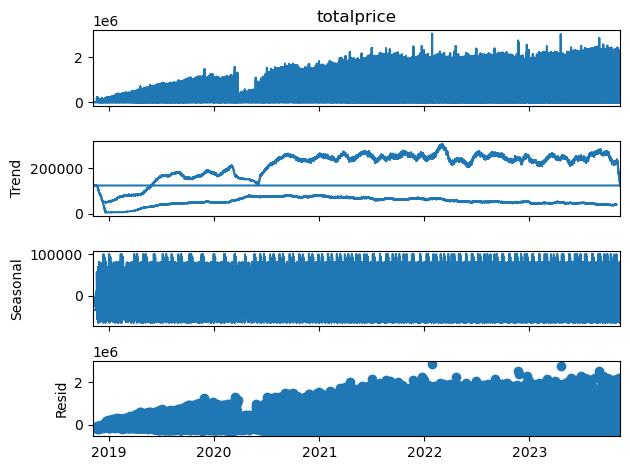

In [11]:
# def function forecast and prediction

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def time_series_analysis_and_forecasting(Product_Sales):
    # Assuming Product_Sales is your DataFrame with 'saledate' as the datetime index
    Product_Sales['saledate'] = pd.to_datetime(Product_Sales['saledate'])
    Product_Sales.index = pd.DatetimeIndex(Product_Sales['saledate'])

    # Seasonal decomposition
    decomp = sm.tsa.seasonal_decompose(Product_Sales['totalprice'], period=1825)  # Assuming a monthly cycle
    decomp.plot()
    plt.show()

    # Lag plot to check autocorrelation
    plt.scatter(Product_Sales['totalprice'][:-1], Product_Sales['totalprice'][1:], s=0.1)
    plt.show()

    # Check if the index is a datetime index
    is_datetime_index = pd.api.types.is_datetime64_any_dtype(Product_Sales.index)
    print("Is datetime index:", is_datetime_index)

    # Resample to daily and sum total prices
    daily_sales = Product_Sales.resample('D').sum(numeric_only=True)
    print("Resampled Daily Sales:")
    print(daily_sales)

    # Split the data into training and testing sets
    start_date = '2018-11-05'
    end_date = '2023-01-01'
    subset_data = len(daily_sales[start_date:end_date])
    train = daily_sales['totalprice'][:subset_data]
    test = daily_sales['totalprice'][subset_data:]

    # Fit the ARIMA model
    order = (2, 0, 12)  # Adjust order based on your analysis
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
    print("ARIMA Predictions:")
    print(predictions)

    # Visualize predictions
    plt.plot(test, label='Test')
    plt.plot(predictions, label='ARIMA Predictions', color='red')
    plt.legend()
    plt.show()

    return daily_sales, predictions

# Assuming Product_Sales is your DataFrame
sales_data, arima_predictions = time_series_analysis_and_forecasting(Product_Sales)
